In [29]:
%matplotlib inline

import scipy.constants
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import scipy as sp
from scipy.optimize import minimize
from matplotlib.patches import Ellipse

0.2 a The Friis free space equation consists of:

$$P_r = P_t + 20 \times \log^{10}{\frac{c}{4\pi f r}}$$

where P_t equals the transmission power, c the speed of sound, f the frequency and r the distance. Plotting this for f is 2.4Ghz and r between 0.4 and 30 metres results in the plot down below. As we can see the router is more sensitive to devices that are closer to the router. The difference in signal strength between devices that are 1 and 2 meters from the router is greater than the difference in signal strength between devices that are 10 and 11 meters from the router.

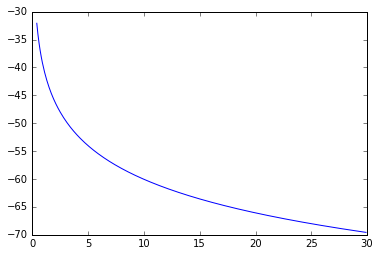

In [30]:
c  = scipy.constants.speed_of_light
f  = 2.4e9
r  = np.arange(0.4, 30, 0.1)
Pt = 0
P  = Pt + 20 * np.log10(c/(4.* np.pi * f * r))

plt.figure(1)
plt.plot(r,P)
plt.show()

b: This equation can also be inverted to r as a function of P_r:
    
$$r = \frac{c}{4 \pi f 10^{\frac{P_r - P_t}{20}}}$$

In [31]:
def getDistance(Pr):
    return c/(4*np.pi*f*math.pow(10, (Pr-Pt)/20))

d30 = getDistance(-31) - getDistance(-30)
d60 = getDistance(-61) - getDistance(-60)

print("The difference in metres between -30 to -31 and -60 to -61 is:", d30, "and", d60)

The difference in metres between -30 to -31 and -60 to -61 is: 0.03835527636485858 and 1.2129003359817592


c: As can be seen above, the difference in distance between 30 and 31 dBm is 0.0384 metres and between -60 and -61 dBm is 1.21 metres. This that with a lower signal strength the difference in strength has a larger influence on the difference in distance.

d: This also means that the uncertainty for the distance is larger when the signal strength is smaller. As an error in the measured signal strength has a larger influance on the resulting calculated distance.

e: In order to reconstruct the location of the client triangulation can be used. There exists unfortunately no exact solution as can be seen in the picture below. There is no point where all the circles intersect 


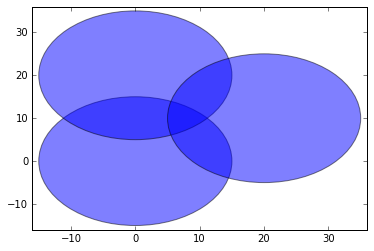

In [32]:
c1 = plt.Circle((0,0), 15, alpha=0.5)
c2 = plt.Circle((0,20), 15, alpha=0.5)
c3 = plt.Circle((20,10), 15, alpha=0.5)
fig,ax=plt.subplots()
plt.xlim(-16,36)
plt.ylim(-16,36)

ax.add_artist(c1)
ax.add_artist(c2)
ax.add_artist(c3)

plt.show()

f: To Calculate the signal strength of a client at a certain location with a certain router the original formula can be rewritten to:

$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f r}})$$
$$P_r = P_t + 20 \times (\log^{10}({\frac{c}{4\pi f}}) - \log^{10}({r}))$$
$$P_r = P_t + 20 \times (\log^{10}({\frac{c}{4\pi f}}) - \log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2}))$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 20 \times \log^{10}(\sqrt{(x-x_i)^2 + (y-y_i)^2 + Z^2})$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 20 \times \log^{10}(((x-x_i)^2 + (y-y_i)^2 + Z^2)^\frac{1}{2})$$
$$P_r = P_t + 20 \times \log^{10}({\frac{c}{4\pi f}}) - 10 \times \log^{10}((x-x_i)^2 + (y-y_i)^2 + Z^2)$$



g: 

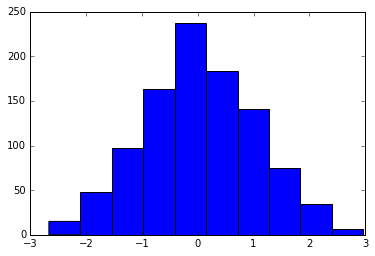

The mean and deviation are: 0.0295198865817 and 1.01368427145


In [33]:
def getExpectedStrength(x, y, xi, yi, Z, Pt):
    return (Pt + 20 * np.log10(c/(4*np.pi*f)) -
            10*np.log10(math.pow(x-xi,2) + math.pow(y-yi,2) + math.pow(Z,2)))

def getMeassuredStrength(x, y, xi, yi, Z, Pt, G, sigma, noise=None):
    if(not noise): 
        noise = np.random.normal(0, sigma);
    return (Pt + G * np.log10(c/(4*np.pi*f)) -
            10*np.log10(math.pow(x-xi,2) + math.pow(y-yi,2) + math.pow(Z,2)) +
            noise)
Z = 2
G = 20

sigma = 1
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]
nRisiduals = (meassurements - expectedStrength)/sigma
plt.hist(nRisiduals, bins=10)
plt.show()

mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)

print("The mean and deviation are:", mean, "and", mu)

h: If you underestimatethe noise/fluctuations/measurement uncertainties, the deviation gets smaller. If you overestimate, the deviation will get larger, meaning you are even more uncertain about your predictions.

The mean and deviation when underestimating are: -0.0283788004405 and 1.94402208335


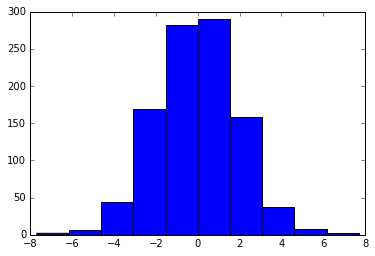

The mean and deviation when overestimating are: -0.00709470011012 and 0.486005520839


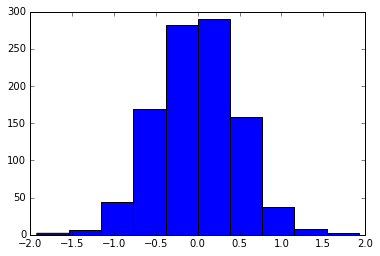

In [34]:
sigma = 2
G = 20
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]

# Underestimate
nRisiduals = (meassurements - expectedStrength)/1
mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)
print("The mean and deviation when underestimating are:", mean, "and", mu)
plt.hist(nRisiduals, bins=10)
plt.show()

# Overestimate
nRisiduals = (meassurements - expectedStrength)/4
mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)
print("The mean and deviation when overestimating are:", mean, "and", mu)
plt.hist(nRisiduals, bins=10)
plt.show()

i: The mean is no longer at zero, which means that there is an single error that affects all measurements.

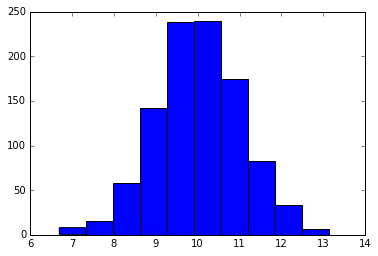

The mean and deviation are: 10.0206881595 and 1.00994079295


In [35]:
G = 15

sigma = 1
expectedStrength = getExpectedStrength(20, 0, 0, 0, Z, 0)
meassurements = [getMeassuredStrength(20, 0, 0, 0, Z, 0, G, sigma) for x in range(1000)]
nRisiduals = (meassurements - expectedStrength)/sigma
plt.hist(nRisiduals, bins=10)
plt.show()

mean = np.mean(nRisiduals)
mu = np.std(nRisiduals)

print("The mean and deviation are:", mean, "and", mu)

j: In general, we would like to see a mean of zero and a deviation of one in my pull distribution.

k: When generating a single wifi packet without noise and an assumed sigma of 1dBm, the $\chi^{2}$ is at its minimum at (5,5) which is the actual position:

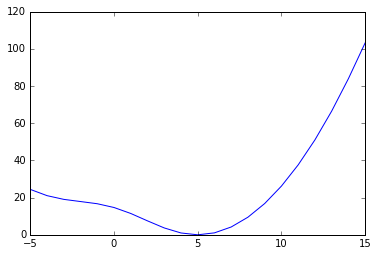

In [36]:
def estimatePositionWithoutNoise(routers, assumedClient, actualClient, sigma, G, Pt):
    x,y,z = assumedClient
    xreal, yreal, zreal = actualClient
    Chi = 0
    for xi,yi,zi in routers:
        Z = zi - z
        Si = getExpectedStrength(x,y,xi,yi,Z,Pt)
        Pri = getExpectedStrength(xreal,yreal,xi,yi,zreal-zi,Pt)
        Chi += math.pow(Si-Pri,2)/math.pow(sigma,2)
    return Chi



routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
actualClient = [5,5,1]
X = np.arange(-5,16,1)
Chis = [[x, estimatePositionWithoutNoise(routers, [x,5,1], actualClient, 1, 20, 0)] for x in X]

Chis = np.matrix(Chis)
plt.plot(Chis[:,0],Chis[:,1])
plt.show()

l: When generating a single wifi packet with random Gaussian noise and a sigma of 1dBm, the $\chi^{2}$ is at its minimum around (5,5) which is the actual position, but not necessarily exactly at (5,5. If you run it different times, the minimum stays around (5,5) sometimes actually being at (5,5) but not always.

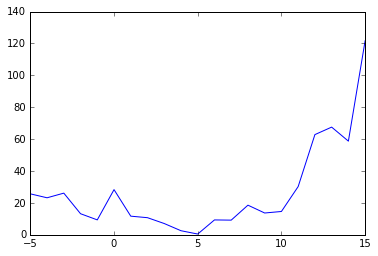

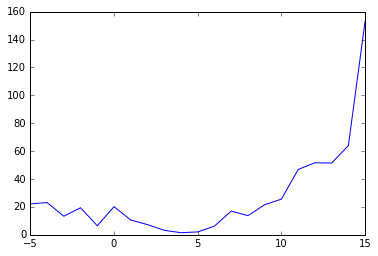

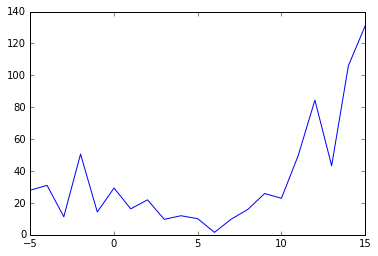

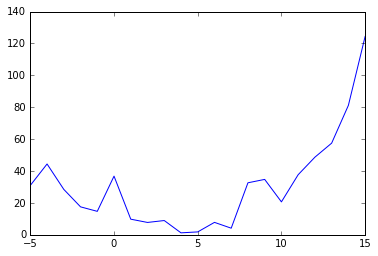

In [37]:
def estimatePositionWithNoise(routers, assumedClient, actualClient, sigma, G, Pt, noise, unc=sigma):
    x,y,z = assumedClient
    xreal, yreal, zreal = actualClient
    Chi = 0
    for i,[xi,yi,zi] in enumerate(routers):
        Z = zi - z
        Si = getExpectedStrength(x,y,xi,yi,Z,Pt)
        Pri = getMeassuredStrength(xreal,yreal, xi, yi, zreal-zi, Pt, G, sigma, noise[i])
        
        Chi += math.pow(Si-Pri,2)/math.pow(unc,2)
    return Chi

routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
actualClient = [5,5,1]
X = np.arange(-5,16,1)
noise = [np.random.normal(0, 1) for x in range(4)]
#Chis = [[x, estimatePositionWithNoise(routers, [x,5,1], actualClient, 1, 20, 0, noise)] for x in X]
for i in range(0,4):
    Chis = []
    for x in X:
        noise = [np.random.normal(0, 1) for x in range(4)]
        Chis.append([x, estimatePositionWithNoise(routers, [x,5,1], actualClient, 1, 20, 0, noise)])

    Chis = np.matrix(Chis)
    plt.plot(Chis[:,0],Chis[:,1])
    plt.show()

m: The minimize function (the Powell method) will find the optimum of the estimated position at location (5,5).

In [38]:
def g(X):
    x,y = X
    routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
    actualClient = [5,5,1]
    return estimatePositionWithoutNoise(routers, [x,y,1], actualClient, 1, 20, 0)

print(minimize(g,[3,8], method='Powell').x)
    

[ 5.  5.]


0.4n: The average estimated position is quite good (around (5,5)), the $\chi^{2}$ value is also close to the expected value of 2. We expect it to be 2 since the number of datapoints (routers) is 4 and the number of parameters is 2 (x and y position).

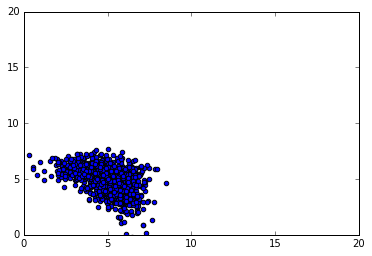

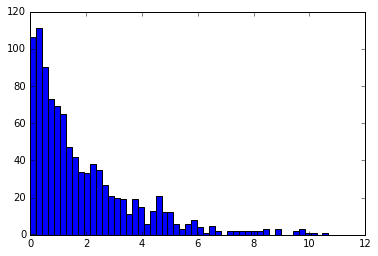

Chi squared = 1.8765259315
Position = [[ 4.87798418  4.93846341]]


In [39]:
noise = []

def g2(X):
    x,y = X
    routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
    actualClient = [5,5,1]
    return estimatePositionWithNoise(routers, [x,y,1], actualClient, 1 ,20, 0, noise)

results = []
Chis = []
#print(minimize(g2,[10,10], method='Powell'))

for i in range(0,1000):
    noise = [np.random.normal(0, 1) for x in range(4)]
    randx = np.random.rand()*19
    randy = np.random.rand()*19
    minimized = minimize(g2,[randx,randy], method='Powell')
    results.append(minimized.x)
    Chis.append(minimized.fun)

results = np.matrix(results)
plt.scatter(results[:,0],results[:,1])
plt.ylim(0,20)
plt.xlim(0,20)
plt.show()

plt.hist(Chis, bins=50)
plt.show()

print("Chi squared =", np.mean(Chis))
print("Position =", results.mean(0))

o: The average $\chi^{2}$ value of the minimums agrees with the NDoF which is 4 - 2 = 2 (number of routers - number of parameters).

p: The minimums hisogram (green in the histogram below) seems to agree with the $\chi^{2}$ histogram (blue in the histogram below) quite well.

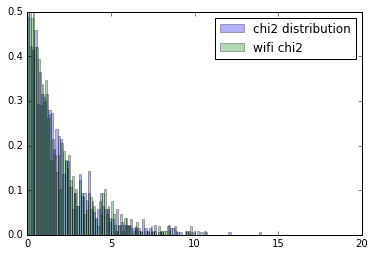

In [40]:
plt.hist(np.random.chisquare(2,1000), alpha=0.3, bins=100,label='chi2 distribution',normed=True)
plt.hist(Chis, bins=100, alpha=0.3, label='wifi chi2', normed=True)
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.legend()
plt.show()


q: The cloud of estimated device positions became more scattered, because we added Gaussian noise with a sigma of 2 while we used a sigma of 1 as an estimation. The $\chi^{2}$ became higher, which is to be expected when we underestimate the noise in our model. The $\chi^{2}$ distribution is more flat than we'd expect, this is also because we underestimate the noise.

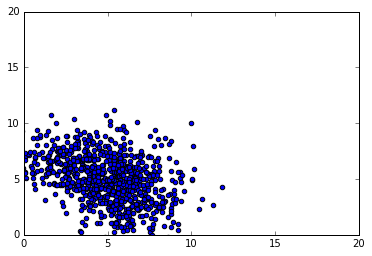

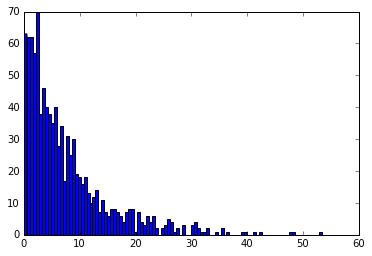

The average chi-squared is: 7.52632327019
The average position is: [[ 4.22608482  4.50809167]]


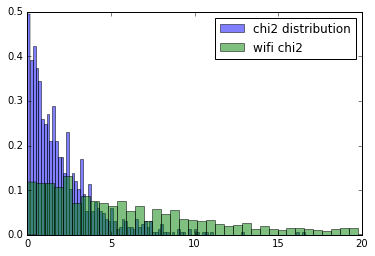

In [41]:
noise = []

def g2(X):
    x,y = X
    routers = [[0, 0, 3],[ 0, 20, 3],[20, 0, 3],[20, 20, 3]]
    actualClient = [5,5,1]
    return estimatePositionWithNoise(routers, [x,y,1], actualClient, 2 ,20, 0, noise, 1)

results = []
Chis = []
#print(minimize(g2,[10,10], method='Powell'))

for i in range(0,1000):
    noise = [np.random.normal(0, 2) for x in range(4)]
    randx = np.random.rand()*19
    randy = np.random.rand()*19
    minimized = minimize(g2,[randx,randy], method='Powell')
    results.append(minimized.x)
    Chis.append(minimized.fun)

results = np.matrix(results)
plt.scatter(results[:,0],results[:,1])
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

plt.hist(Chis, bins=100)
plt.show()

print("The average chi-squared is:", np.mean(Chis))
print("The average position is:", results.mean(0))

plt.hist(np.random.chisquare(2,1000), alpha=0.5, bins=100,label='chi2 distribution',normed=True)
plt.hist(Chis, bins=100, alpha=0.5, label='wifi chi2', normed=True)
plt.xlim(0,20)
plt.ylim(0,0.5)
plt.legend()
plt.show()

r: When the average minimim $\chi^{2}$ value is much higher than the NDoF, it means that either the model is wrong or the measurement/data uncertainties have been underestimated. Experimenting with the uncertainties should explain whether the model was wrong or the initial estimated uncertainties were wrong.


**0.5**

s) <br>
let:
$C_{i} = P_{i}(x_0,y_0),
D_{x/y}^{i} = \frac{\partial}{\partial x/y} C_{i}
$ <br>


$$
\begin{aligned}
\chi^2 &= \sum_{i} \frac{1}{\sigma_{i}^2}\left(S_{i} - P_{i}(x,y)\right)^2 \\
&= \sum_{i} \frac{1}{\sigma_{i}^2}\left(S_{i} - (C_{i} + D_{x}^{i}(x-x_0) + D_{y}^{i}(y -y_0) ) \right)^2 \\
&= \sum_{i} \left( (S_{i} - C_{i})^2 - 2 (S_{i} - C_{i})\left(D_{x}^{i}(x-x_0) + D_{y}^{i}(y -y_0)\right) + \left(D_{x}^{i}(x-x_0) + D_{y}^{i}(y -y_0)\right)^2 \right)
\end{aligned}
$$ <br>

This can be expanded further but with little insight gained.

t) <br>


$$
\begin{aligned}
\frac{\partial}{\partial x} \chi^2 &= \frac{\partial}{\partial x} \sum_{i} \frac{1}{\sigma_{i}^2}\left(S_{i} - P_{i}(x,y)\right)^2 \\
&= \sum_{i} 2 \frac{1}{\sigma_{i}^2}\left(S_{i} - P_{i}(x,y)\right) \frac{\partial}{\partial x} P_{i}(x,y)
\end{aligned}
$$ <br>

Making the substitution from $(3)$ and by noticing 
$$ 
\begin{aligned}
\frac{\partial}{\partial x} P_{i}(x,y) &=  \frac{\partial}{\partial x} P_{i}(x_0,y_0) \\
&= D_{x}^{i}
\end{aligned}
$$ 
we see: <br>

$$
\begin{aligned}
\frac{\partial}{\partial x} \chi^2 &= 2 \sum_{i} \frac{D_{x}^{i}}{\sigma_{i}^2}\left(S_{i} - C_{i} + D_{x}^{i}(x-x_0) +D_{y}^{i}(y -y_0)  \right)
\end{aligned}
$$ <br>

from $(4)$:
$$
\begin{aligned}
2 \sum_{i} \frac{D_{x}^{i}}{\sigma_{i}^2}\left(S_{i} - C_{i} + D_{x}^{i}(x-x_0) +D_{y}^{i}(y -y_0)  \right)
&= 2 \sum_{i} \frac{D_{x}^{i}}{\sigma_{i}^2}\left(S_{i} - C_{i} \right)
\end{aligned}
$$ <br>

so:
$$
\begin{aligned}
\sum_{i} \left(D_{x}^{i}(x-x_0) +D_{y}^{i}(y -y_0)  \right) &= 0
\end{aligned}
$$ <br>

by substituting this back into the taylor expanded $\chi^2$ we get:
$$
\begin{aligned}
\chi^2 &= \sum_{i} \frac{1}{\sigma_{i}^2} \left( (S_{i} - C_{i})^2 + \left(D_{x}^{i}(x-x_0) + D_{y}^{i}(y -y_0)\right)^2 \right) \\
&= \sum_{i} \frac{1}{\sigma_{i}^2} \left( (S_{i} - C_{i})^2 + (D_{x}^{i})^2(x-x_0)^2 + (D_{y}^{i})^2(y -y_0)^2 + 2 D_{x}^{i}(x-x_0)D_{y}^{i}(y -y_0)\right)
\end{aligned}
$$ <br>

u) <br>
with $(x - x_0) = \Delta x$ and $(y - y_0) = \Delta y$ <br>
$$
\begin{aligned}
\chi^2 &= \sum_{i} \frac{1}{\sigma_{i}^2} \left( (S_{i} - C_{i})^2 + (D_{x}^{i})^2\Delta x^2 + (D_{y}^{i})^2\Delta y^2 + 2 D_{x}^{i}D_{y}^{i}\Delta x\Delta y\right) \\
&= \left( \sum_{i} \frac{1}{\sigma_{i}^2} (S_{i} - C_{i})^2 \right) + \sum_{i} \frac{1}{\sigma_{i}^2} \left((D_{x}^{i})^2\Delta x^2 + (D_{y}^{i})^2\Delta y^2 + 2 D_{x}^{i}D_{y}^{i}\Delta x\Delta y\right)
\end{aligned}
$$ <br>


with
$$
A =  \left( \sum_{i} \frac{1}{\sigma_{i}^2} (S_{i} - C_{i})^2 \right)
$$
$$
\hat{B} = 
\begin{bmatrix}
\sum_{i}\frac{1}{\sigma_{i}^2}(D_{x}^{i})^2 & \sum_{i}\frac{1}{\sigma_{i}^2} D_{x}^{i}D_{y}^{i} \\
\sum_{i}\frac{1}{\sigma_{i}^2} D_{x}^{i}D_{y}^{i} & \sum_{i}\frac{1}{\sigma_{i}^2} (D_{y}^{i})^2 
\end{bmatrix}
$$

then:
$$
\chi^2 = A + (\Delta x, \Delta y) \hat{B} (\Delta x, \Delta y)^{T}
$$

v) <br>
assume:
$$
\chi_0 = \chi^2(x_0, y_0) \\
\chi_1 = \chi^2(x_1,y_1) \\
$$

with $\chi_1 = \chi_0 + 1$ so:
$$
(\Delta x_1, \Delta y_1) \hat{B} (\Delta x_1, \Delta y_1)^{T} = (\Delta x_0, \Delta y_0) \hat{B} (\Delta x_0, \Delta y_0)^{T} + 1
$$

but as $\Delta x_0 = x_0 - x_0 = 0$ this simplifies to:
$$
(\Delta x_1, \Delta y_1) \hat{B} (\Delta x_1, \Delta y_1)^{T} = 1
$$

this can be rewritten in the form
$$
\Delta x_1^2 \left[D_{x}^{i}\right]^2 + \Delta x_1\left[2 \Delta y_1 D_{x}^{i} D_{y}^{i} \right] + \left[ \Delta y_1^2(D_{y}^{i})^2 - 1 \right] = 0
$$

so solving using the quadratic formula gives the result
$$
\Delta x_1 = \frac{-\Delta y_1 D_{y}^{i} \pm 1}{D_{x}^{i}}
$$



NOTES: this seems wrong, there is still more to do so maybe we should ask on tuesday/wednesday

for w) onwards..



covariance matrix of x & y is given by $\hat{B}^{-1}$ so...

variance of x & y is given by $tr(\hat{B}^{-1})$

noise should definitely not be 1, if the noise is good then $\chi^{2}$

0.884769444105
0.420525050376


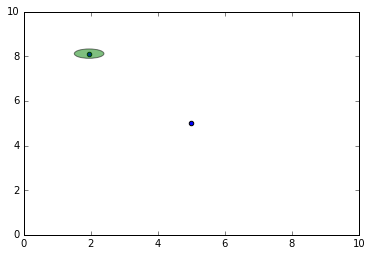

In [42]:
actualXY = [5,5]
noise = [np.random.normal(0, 1) for x in range(4)]
randx = np.random.rand()*19
randy = np.random.rand()*19
minimized = minimize(g2,[randx,randy], method='Powell')
estimatedXY = minimized.x

#dFdx = (40(x - xi))/(math.log(10)*((x-xi)^2 + (y-yi)^2 + Z^2))
#dFdy = (40(y - yi))/(math.log(10)*((x-xi)^2 + (y-yi)^2 + Z^2))
B11 = 0
B22 = 0
B12 = 0

x = [0,0,20,20]
y = [0,20,0,20]
Z = 2

for i in range(0,4):
    dFdx = (40*(estimatedXY[0] - x[i]))/(math.log(10)*((estimatedXY[0]-x[i])**2 + (estimatedXY[1]-y[i])**2 + Z**2))
    dFdy = (40*(estimatedXY[1] - y[i]))/(math.log(10)*((estimatedXY[0]-x[i])**2 + (estimatedXY[1]-y[i])**2 + Z**2))
    B11 += (dFdx**2 * 1/(sigma**2))
    B22 += (dFdy**2 * 1/(sigma**2))
    B12 += (dFdx * dFdy * 1/(sigma**2))

varx = B22 / (B11*B22 - B12**2)
vary = B11 / (B11*B22 - B12**2)

stdx = np.sqrt(varx)
stdy = np.sqrt(vary)
print(stdx)
print(stdy)

e = Ellipse(estimatedXY, width = stdx, height=stdy)
plt.scatter(actualXY[0],actualXY[1])
plt.scatter(estimatedXY[0], estimatedXY[1])
plt.gca().add_artist(e)

e.set_alpha(0.5)
e.set_facecolor('g')
plt.xlim(0,10)
plt.ylim(0,10)

plt.show()

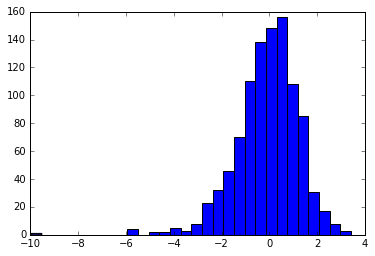

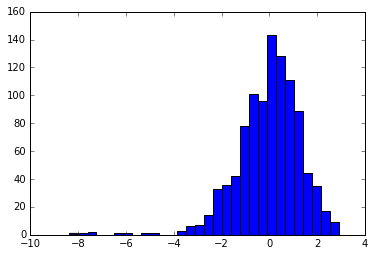

In [43]:
actualXY = [5,5]
x = [0,0,20,20]
y = [0,20,0,20]
Z = 2
sigma = 1

residualsX = []
residualsY = []
uncertainties = []

for i in range(1000):
    noise = [np.random.normal(0, 1) for x in range(4)]
    randx = np.random.rand()*19
    randy = np.random.rand()*19
    minimized = minimize(g2,[randx,randy], method='Powell')
    estimatedXY = minimized.x

    #dFdx = (40(x - xi))/(math.log(10)*((x-xi)^2 + (y-yi)^2 + Z^2))
    #dFdy = (40(y - yi))/(math.log(10)*((x-xi)^2 + (y-yi)^2 + Z^2))
    B11 = 0
    B22 = 0
    B12 = 0

    for i in range(0,4):
        dFdx = (40*(estimatedXY[0] - x[i]))/(math.log(10)*((estimatedXY[0]-x[i])**2 + (estimatedXY[1]-y[i])**2 + Z**2))
        dFdy = (40*(estimatedXY[1] - y[i]))/(math.log(10)*((estimatedXY[0]-x[i])**2 + (estimatedXY[1]-y[i])**2 + Z**2))
        B11 += (dFdx**2 * 1/(sigma**2))
        B22 += (dFdy**2 * 1/(sigma**2))
        B12 += (dFdx * dFdy * 1/(sigma**2))

    varx = B22 / (B11*B22 - B12**2)
    vary = B11 / (B11*B22 - B12**2)

    stdx = np.sqrt(varx)
    stdy = np.sqrt(vary)
    
    residualsX.append((estimatedXY[0]-actualXY[0])/sigma)
    residualsY.append((estimatedXY[1]-actualXY[1])/sigma)
    uncertainties.append([stdx,stdy])

plt.hist(residualsX, bins=30)
plt.show()

plt.hist(residualsY, bins=30)
plt.show()

The centers are where we expect them to be and about as wide as we expect it to be. If we would over or underestimate the uncertainty we would expect a pull distribution that is either centered incorrectly or with a variance that is not 1.

z: If underestimate the measurement error by a factor 2, we expect the width of the pull distribution of the estimated errors on the x and y positions to become wider by a factor 2.

**0.6a**

In [44]:
minGroupSize = 3
maxTimePassed = 1000

def readAndFilterData():
    reader = csv.reader(open('UvA-wifitracking-exercise-prepped-data.csv'));

    # Read data
    skippedHeader = False
    data = []
    for entry in reader:
        if not skippedHeader:
            skippedHeader = True
            continue
        data.append({'seqNr': int(entry[3]), 'timeStamp': int(entry[5]), 'droneId': entry[6], 'signal': int(entry[7])})

    # Sort by seqNr then measurementTimestamp
    data = sorted(data, key=lambda entry: (entry['seqNr'], entry['timeStamp']))

    # Create new group if: different seqNr or too much time has passed
    groupedData = []
    currentGroup = []
    firstEntry = True
    for entry in data:
        if firstEntry:
            currentGroup.append(entry)
            firstEntry = False
            continue
        # if new seqNr compared to prev. entry
        if currentGroup[-1]['seqNr'] != entry['seqNr']:
            if len(currentGroup) >= minGroupSize:
                groupedData.append(currentGroup[:])
            currentGroup = [entry]
            continue
        # if too much time past compared to prev entry
        if entry['timeStamp'] - currentGroup[-1]['timeStamp'] > maxTimePassed:
            if len(currentGroup) >= minGroupSize:
                groupedData.append(currentGroup[:])
            currentGroup = [entry]
            continue
        currentGroup.append(entry)
    return groupedData

data = readAndFilterData()
for group in data:
    print()
    for entry in group:
        print("   ", entry)
print("groups: ", len(data))


    {'timeStamp': 1423136679437, 'seqNr': 1, 'droneId': 'Oscar', 'signal': -80}
    {'timeStamp': 1423136679439, 'seqNr': 1, 'droneId': 'Hotel', 'signal': -75}
    {'timeStamp': 1423136679446, 'seqNr': 1, 'droneId': 'Lima', 'signal': -78}
    {'timeStamp': 1423136679448, 'seqNr': 1, 'droneId': 'India', 'signal': -78}
    {'timeStamp': 1423136679455, 'seqNr': 1, 'droneId': 'Mike', 'signal': -95}
    {'timeStamp': 1423136679455, 'seqNr': 1, 'droneId': 'Romeo', 'signal': -91}
    {'timeStamp': 1423136679505, 'seqNr': 1, 'droneId': 'Kilo', 'signal': -84}

    {'timeStamp': 1423136407778, 'seqNr': 12, 'droneId': 'Oscar', 'signal': -57}
    {'timeStamp': 1423136407779, 'seqNr': 12, 'droneId': 'Hotel', 'signal': -68}
    {'timeStamp': 1423136407784, 'seqNr': 12, 'droneId': 'Papa', 'signal': -60}
    {'timeStamp': 1423136407788, 'seqNr': 12, 'droneId': 'November', 'signal': -68}
    {'timeStamp': 1423136407789, 'seqNr': 12, 'droneId': 'India', 'signal': -66}
    {'timeStamp': 1423136407796, '

**0.6b**

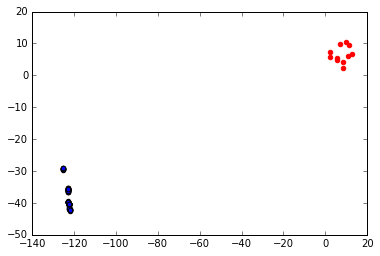

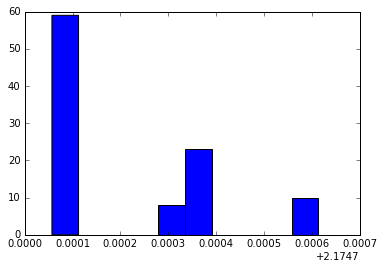

2.17490392608


In [98]:
routers = {'Lima': [5.82, 5.48],
          'Mike': [11.33, 9.43],
          'Kilo': [12.93, 6.77],
          'Oscar': [2.48, 7.36],
          'Alpha': [8.53, 2.16],
          'India': [2.18, 5.61],
          'November': [8.34, 4.13],
          'Hotel': [5.43, 4.71],
          'Romeo': [10.99, 5.94],
          'Quebec': [6.82, 9.78],
          'Papa': [9.9, 10.39]}

Pt = 0
sigma = 12
nSamples = 100

initialPosition = []
currentGroup = []
positions = []
chis = []

def estimatePosition(devicePosition):
    x,y = devicePosition
    Chi = 0
    for packet in currentGroup:
        routerLocation = routers[packet['droneId']]
        xi = routerLocation[0]
        yi = routerLocation[1]
        Z = 2
        Si = getExpectedStrength(x,y,xi,yi,Z,Pt)
        Pri = packet['signal']
        
        Chi += math.pow(Si-Pri,2)/math.pow(sigma,2)
    return Chi

def getRandomInitialPosition():
    xMin = min(routers.values(), key=lambda router: router[0])[0]
    yMin = min(routers.values(), key=lambda router: router[1])[1]
    xMax = max(routers.values(), key=lambda router: router[0])[0]
    yMax = max(routers.values(), key=lambda router: router[1])[1]
    
    randX = np.random.rand()*(xMax-xMin)
    randY = np.random.rand()*(yMax-yMin)
    
    return [randX, randY]

for group in data:
    position = [0,0]
    chi = 0;
    currentGroup = group
    for i in range(nSamples):
        initialPosition = getRandomInitialPosition()
        
        result = minimize(estimatePosition, initialPosition, method='Powell')
        #position[0] = position[0] + (1/nSamples) * result.x[0]
        #position[1] = position[1] + (1/nSamples) * result.x[1]
        
        #chi += (1/nSamples) * result.fun
        
        positions.append([result.x[0], result.x[1]])
        chis.append(result.fun)
        
    break
        
    #positions.append(position)
    #chis.append(chi)
    
routerPositions = np.matrix(list(routers.values()))
positions = np.matrix(positions)
plt.scatter(routerPositions[:,0], routerPositions[:,1], color='r') 
plt.scatter(positions[:,0], positions[:,1])

plt.show()

plt.hist(chis, bins=10)
plt.show()

print(np.mean(chis))